# Machine Learning Computer Homework 3
## Handwritten image classification
## Part1: SVM (100)
In machine learning, support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis, Developed at AT&T Bell Laboratories.

In this part, you will implement an SVM to classify handwritten digits! \
The task is to predict number in a picture, which is between 0 and 9. then we use a Neural network to do the same job and compare their results. \   

You are only required to write code in the sections marked with `# TODO:` 
Feel free to contact me via telegram if you have any question: @mamin_rami, @Amin_pourghani

In [1]:
# Import datasets, classifiers and performance metrics
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Q1.Plotting random images (10)
Plot few images from dataset to get intuition about dataset. 
Remember to plot the pictures' labels too

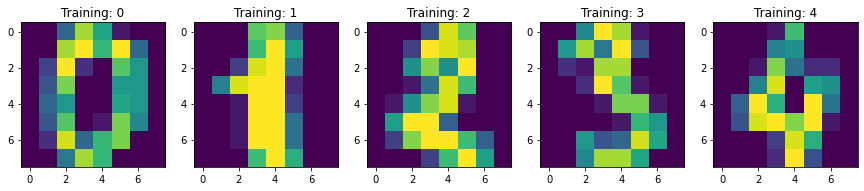

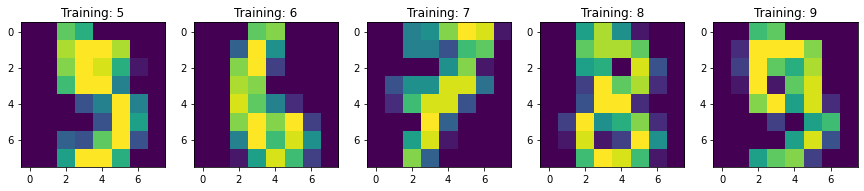

In [2]:
#Loading digits dataset from sklearn preloaded datasets
digits = datasets.load_digits()

#TODO

fig = plt.figure(figsize=(15,30)) 
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
    ax.imshow(digits.images[i])
    ax.set_title('Training: '+str(i))

fig = plt.figure(figsize=(15,30)) 
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
    ax.imshow(digits.images[i+5])
    ax.set_title('Training: '+str(i+5))

In [3]:
# Flatten the images
#TODO 
d1,_,_ = digits.images.shape
print(digits.images.shape)
images_flatten = digits.images.reshape((d1, -1))
print(images_flatten.shape)

(1797, 8, 8)
(1797, 64)


## Q2.Splitting data (10)
split data into 60% train and 40% test subsets.

In [4]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(images_flatten,digits.target, test_size=0.4, shuffle=False)

print('X_Train size: ',str(X_train.shape))
print('X_Test size: ',str(X_test.shape))
print('y_Train size: ',str(y_train.shape))
print('y_Test size: ',str(y_test.shape))


X_Train size:  (1078, 64)
X_Test size:  (719, 64)
y_Train size:  (1078,)
y_Test size:  (719,)


 ## Q3.Creating a classifier: a support vector classifier (60)
 You can adjust the hyperparameters of the model to get a better result. \
 for this part, use linear kernel:

In [5]:
#TODO
clf = svm.SVC(kernel='linear',gamma=0.001)


In [6]:
# Learn the digits on the train subset
#TODO
clf.fit(X_train,y_train)

SVC(gamma=0.001, kernel='linear')

In [7]:
# Predict the value of the digit on the test subset
#TODO
predicted = clf.predict(X_test)

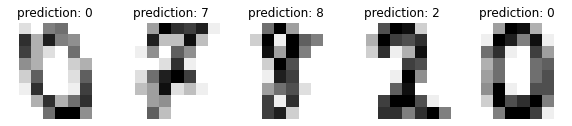

In [8]:
# Plot 5 samples of test set and their corresponding predicted label.
#TODO
_,axes = plt.subplots(nrows=1,ncols = 5, figsize=(10,30))
for ax, image, prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"prediction: {prediction}")

## Q4. Model metrics (20)
To see the fitting quality, print thee metrics of the model:

In [9]:
# Use metrics.classification_report() method to get an overview of model's performance
# TODO
print(f"Classification report for svm clasifier {clf}:\n"
     f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for svm clasifier SVC(gamma=0.001, kernel='linear'):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.94      0.88      0.91        73
           2       1.00      0.97      0.99        71
           3       0.95      0.82      0.88        74
           4       1.00      0.95      0.97        74
           5       0.92      0.99      0.95        71
           6       0.97      0.99      0.98        74
           7       0.92      0.96      0.94        72
           8       0.84      0.91      0.87        68
           9       0.88      0.93      0.90        71

    accuracy                           0.94       719
   macro avg       0.94      0.94      0.94       719
weighted avg       0.94      0.94      0.94       719




Confusion matrix:
[[70  0  0  0  0  0  1  0  0  0]
 [ 0 64  0  0  0  0  0  0  3  6]
 [ 1  0 69  1  0  0  0  0  0  0]
 [ 0  0  0 61  0  3  0  3  7  0]
 [ 1  0  0  0 70  0  0  0  0  3]
 [ 0  0  0  0  0 70  1  0  0  0]
 [ 0  1  0  0  0  0 73  0  0  0]
 [ 0  1  0  0  0  0  0 69  2  0]
 [ 0  2  0  1  0  1  0  2 62  0]
 [ 1  0  0  1  0  2  0  1  0 66]]


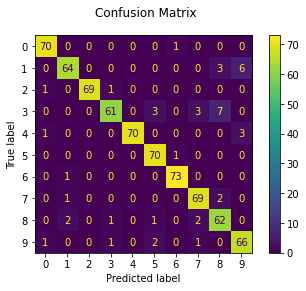

In [10]:
# Plot the confusion matrix of the model using metrics library
#TODO
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

### Repeat the steps you took, but this time use gaussian kernel(rbf kernel)

In [11]:
# TODO
rbf = svm.SVC(kernel='rbf',gamma=0.001)
rbf.fit(X_train,y_train)
predicted = rbf.predict(X_test)

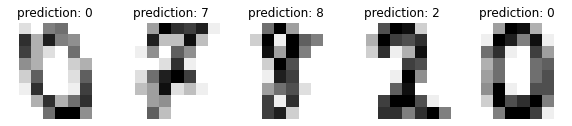

In [12]:
_,axes = plt.subplots(nrows=1,ncols = 5, figsize=(10,30))
for ax, image, prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"prediction: {prediction}")

In [13]:
print(f"Classification report for svm clasifier {rbf}:\n"
     f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for svm clasifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.99      0.96      0.97        73
           2       0.99      0.97      0.98        71
           3       0.97      0.84      0.90        74
           4       0.99      0.96      0.97        74
           5       0.95      0.99      0.97        71
           6       0.99      0.99      0.99        74
           7       0.95      1.00      0.97        72
           8       0.92      1.00      0.96        68
           9       0.95      0.97      0.96        71

    accuracy                           0.97       719
   macro avg       0.97      0.97      0.96       719
weighted avg       0.97      0.97      0.96       719




Confusion matrix:
[[70  0  0  0  1  0  0  0  0  0]
 [ 0 70  1  0  0  0  0  0  1  1]
 [ 1  0 69  1  0  0  0  0  0  0]
 [ 0  0  0 62  0  3  0  4  5  0]
 [ 0  0  0  0 71  0  0  0  0  3]
 [ 0  0  0  0  0 70  1  0  0  0]
 [ 0  1  0  0  0  0 73  0  0  0]
 [ 0  0  0  0  0  0  0 72  0  0]
 [ 0  0  0  0  0  0  0  0 68  0]
 [ 0  0  0  1  0  1  0  0  0 69]]


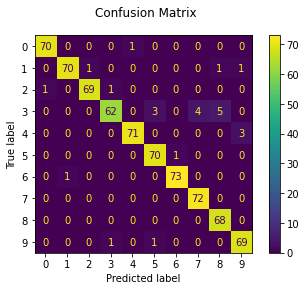

In [14]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()